#### Text classification using SVM and K-Nearest Neighbours. We'll extract data via TF-IDF.
Data - https://www.kaggle.com/datasets/kazanova/sentiment140

```
It contains the following 6 fields:

target: the polarity of the tweet (0 = negative, 2 = neutral, 4 = positive)

ids: The id of the tweet ( 2087)

date: the date of the tweet (Sat May 16 23:58:44 UTC 2009)

flag: The query (lyx). If there is no query, then this value is NO_QUERY.

user: the user that tweeted (robotickilldozr)

text: the text of the tweet (Lyx is cool)
```
Data - https://www.kaggle.com/competitions/titanic

In [1]:
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn import metrics
from sklearn.svm import SVC
from scipy import sparse


from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer



In [2]:
df = pd.read_csv('/home/suraj/ClickUp/Jan-Feb/data/training.1600000.processed.noemoticon.csv',header=None)

In [3]:
columns = ['target','ids','date','flag','user','text']
df.columns = columns

In [4]:
df

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [5]:
# cleaning the dataframe by removing irrelevant characters, mention, RTs and Link 
df['text']=df['text'].str.lower().str.replace('[^\w\s]','').str.replace('\d+','').str.replace('\n',' ').replace('\r','').str.replace("[^a-zA-Z0-9\s]",'').str.replace("mention", "").str.replace("rt", "").str.replace("link", "")    

/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [6]:
df

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,switchfoot httptwitpiccomyzl awww thats a bum...
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he cant update his facebook by t...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,kenichan i dived many times for the ball manag...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,nationwideclass no its not behaving at all im ...
...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,just woke up having no school is the best feel...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,thewdbcom very cool to hear old walt intervie...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,are you ready for your mojo makeover ask me fo...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,happy th bihday to my boo of alll time tupac a...


In [7]:
len(df)

1600000

In [8]:
# checking if there are any null values
df.isnull().sum()

target    0
ids       0
date      0
flag      0
user      0
text      0
dtype: int64

In [9]:
# dropping ids, date, flag
pruned_df = df.drop(['ids','date','flag'], axis=1)
pruned_df.head()

,target,user,text
0,0,_TheSpecialOne_,switchfoot httptwitpiccomyzl awww thats a bum...
1,0,scotthamilton,is upset that he cant update his facebook by t...
2,0,mattycus,kenichan i dived many times for the ball manag...
3,0,ElleCTF,my whole body feels itchy and like its on fire
4,0,Karoli,nationwideclass no its not behaving at all im ...


<AxesSubplot:xlabel='target', ylabel='count'>

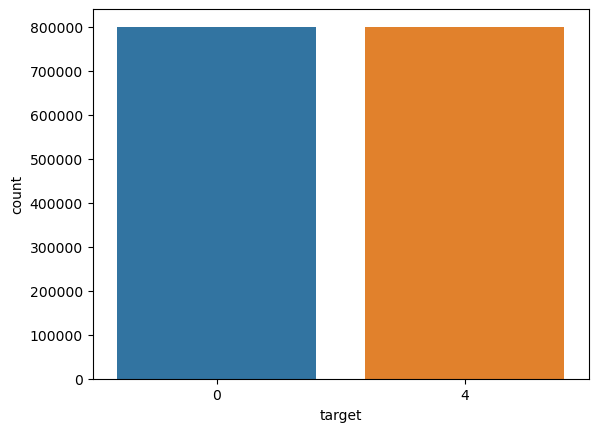

In [10]:
#checking the label distribution
sns.countplot(x ='target', data = pruned_df)


In [11]:
X = pruned_df['text']
y = pruned_df['target']

In [12]:
# splitting the data into train_test
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.35)
print("Shape of Training data is {}".format(X_train.shape))
print("Shape of Testing data is {}".format(X_test.shape))

Shape of Training data is (1040000,)
Shape of Testing data is (560000,)


In [13]:
# creating word level and char level tf-idf vectors
word_vect = TfidfVectorizer(max_features=20000, lowercase=True, analyzer='word',stop_words= 'english',ngram_range=(1,3),dtype=np.float32)

char_vect = TfidfVectorizer(max_features=40000, lowercase=True, analyzer='char',stop_words= 'english',ngram_range=(3,6),dtype=np.float32)

In [14]:
# Word ngram vector
train_word_vect = word_vect.fit_transform(X_train)
print("Done")
test_word_vect = word_vect.transform(X_test)
print("Done")


# Character n gram vector
train_char_vect = char_vect.fit_transform(X_train)
print("Done")

test_char_vect = char_vect.transform(X_test)
print("Done")


Done
Done
Done
Done


In [15]:
train_features = sparse.hstack([train_word_vect,train_char_vect])
print("Done")
test_features = sparse.hstack([test_char_vect,test_word_vect])
print("Done")

Done
Done


In [16]:
del train_word_vect, test_word_vect, train_char_vect, test_char_vect


In [17]:
train_features.shape

(1040000, 60000)

In [18]:
y_train.shape

(1040000,)

In [19]:
svc = SVC(kernel='rbf', random_state=1, gamma=0.1, C=0.02)
svc.fit(train_features,y_train)

In [ ]:
pred = svc.predict(test_features)
print(metrics.confusion_matrix(y_test,pred))

In [ ]:
# adding labels to visualise the confusion matrix better
matrix = pd.DataFrame(metrics.confusion_matrix(y_test,pred), index=['0','4'])

In [ ]:
#printing the overall accuracy
print(metrics.accuracy_score(y_test,pred))

In [ ]:
# printing classification report
print(metrics.classification_report(y_test,pred))

In [ ]:
#printing the overall accuracy
print(metrics.accuracy_score(y_test,pred))

## End remarks
We can play with multiple kernels like RBF etc and gamma functions to get the optimum value. We can also use preprocessing like Stemming and lemmatisation prior passing it to Count Vectorizer and TFIDF in a pipeline to evaluate.

Besides, This - we can also use KNN.
